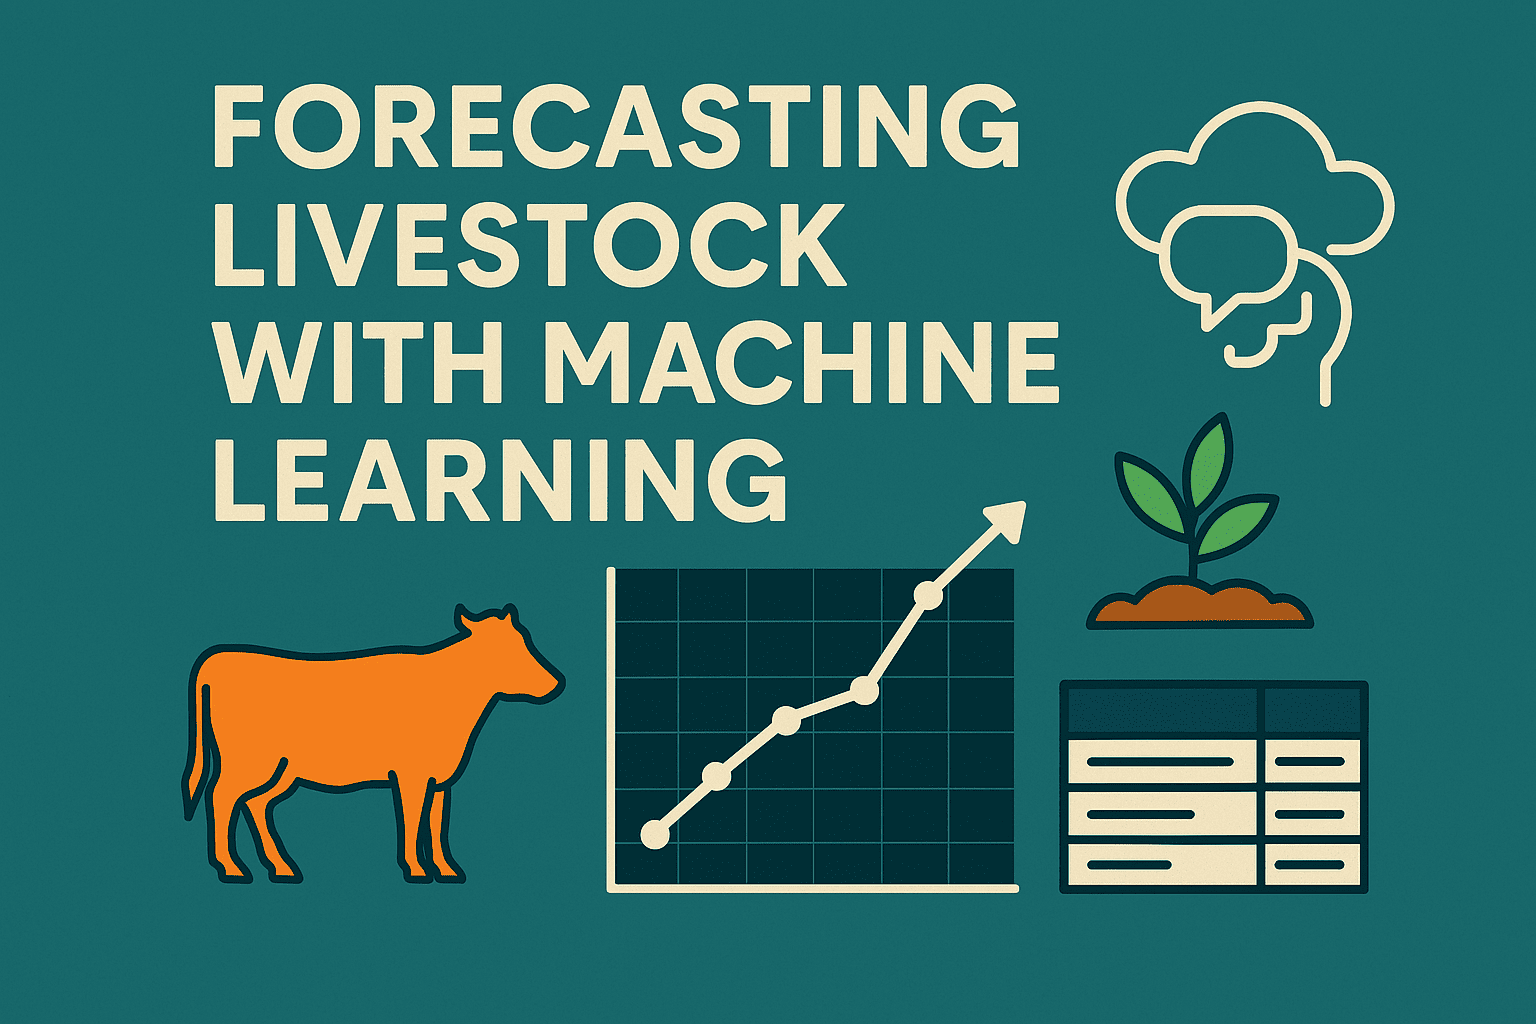

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in greater")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in less")

In [2]:
df = pd.read_csv('/kaggle/input/inventario-bovinos-colombia-antioquia-2000-2022/Inventario_anual_de_Bovinos_en_Antioquia_desde_2000-2022_20250327.csv')

In [3]:
df.shape

(2721, 21)

In [4]:
df.columns

Index(['AÑO', 'SUBREGION', 'RUBRO', 'MUNICIPIO', 'BOVINOS Cría Macho (< DE 12)', 'BOVINOS Novillo Levante (12-24)', 'BOVINOS Novillo  Ceba ( 24-36)', 'BOVINOS Toros (> 36)', 'TOTAL MACHOS', 'BOVINOS Cría Hembra (< DE 12)', 'BOVINOS Novilla Levante ( 12-24)', 'BOVINOS Novilla Vientre ( 24-36)', 'BOVINOS Vaca (> 36)', 'TOTAL HEMBRAS', 'Total Bovinos', 'Pasto Corte (ha)', 'Pasto Natural (ha)', 'Pasto Mejorado (ha)', 'Pasto Forrajero (ha)', 'Silvopastoril (ha)', 'Total Pastos (ha)'], dtype='object')

In [5]:
df.dtypes

AÑO                                   int64
SUBREGION                            object
RUBRO                                object
MUNICIPIO                            object
BOVINOS Cría Macho (< DE 12)        float64
BOVINOS Novillo Levante (12-24)     float64
BOVINOS Novillo  Ceba ( 24-36)      float64
BOVINOS Toros (> 36)                float64
TOTAL MACHOS                          int64
BOVINOS Cría Hembra (< DE 12)       float64
BOVINOS Novilla Levante ( 12-24)    float64
BOVINOS Novilla Vientre ( 24-36)    float64
BOVINOS Vaca (> 36)                 float64
TOTAL HEMBRAS                         int64
Total Bovinos                       float64
Pasto Corte (ha)                    float64
Pasto Natural (ha)                  float64
Pasto Mejorado (ha)                 float64
Pasto Forrajero (ha)                float64
Silvopastoril (ha)                  float64
Total Pastos (ha)                   float64
dtype: object

In [6]:
df.describe()

,AÑO,BOVINOS Cría Macho (< DE 12),BOVINOS Novillo Levante (12-24),BOVINOS Novillo Ceba ( 24-36),BOVINOS Toros (> 36),TOTAL MACHOS,BOVINOS Cría Hembra (< DE 12),BOVINOS Novilla Levante ( 12-24),BOVINOS Novilla Vientre ( 24-36),BOVINOS Vaca (> 36),TOTAL HEMBRAS,Total Bovinos,Pasto Corte (ha),Pasto Natural (ha),Pasto Mejorado (ha),Pasto Forrajero (ha),Silvopastoril (ha),Total Pastos (ha)
count,2721.000000,2714.000000,2717.000000,2715.000000,2720.000000,2721.000000,2720.000000,2720.000000,2719.000000,2720.000000,2721.000000,2720.000000,2467.000000,2672.000000,2569.000000,553.000000,905.000000,2712.000000
mean,2011.241823,1689.172071,2463.023923,2188.587477,813.605147,7141.297317,2187.166176,2882.527574,2550.333579,6794.866544,14408.658949,21557.879044,443.087556,11750.198772,10176.670725,487.428933,1198.062144,22132.074543
std,6.689403,2590.425539,3566.462017,3365.926840,2667.771812,10343.879814,3218.528949,3930.117660,3424.101356,10060.239841,20059.068097,28269.901574,1729.346167,14402.016221,17722.817340,2445.261189,5022.532439,28967.526081
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2005.000000,368.000000,513.000000,313.000000,116.000000,1537.000000,466.750000,736.000000,661.500000,1257.000000,3543.000000,5657.250000,40.000000,2950.000000,500.000000,10.000000,17.000000,5350.000000
50%,2012.000000,735.500000,1222.000000,844.000000,258.000000,3410.000000,992.000000,1512.000000,1443.000000,2946.500000,7071.000000,11722.000000,78.000000,7076.000000,2600.000000,23.000000,43.000000,12421.000000
75%,2017.000000,1723.000000,2620.000000,2447.000000,628.000000,7541.000000,2356.000000,2985.500000,2889.000000,7094.500000,15072.000000,23786.000000,200.500000,15000.000000,11210.000000,81.000000,200.000000,26135.000000
max,2022.000000,20117.000000,27537.000000,29603.000000,55643.000000,111135.000000,29975.000000,27545.000000,38687.000000,78988.000000,169415.000000,184876.000000,22905.000000,150000.000000,135180.000000,20211.000000,48506.000000,237142.000000


# Data cleaning

In [7]:
df.head()

,AÑO,SUBREGION,RUBRO,MUNICIPIO,BOVINOS Cría Macho (< DE 12),BOVINOS Novillo Levante (12-24),BOVINOS Novillo Ceba ( 24-36),BOVINOS Toros (> 36),TOTAL MACHOS,BOVINOS Cría Hembra (< DE 12),BOVINOS Novilla Levante ( 12-24),BOVINOS Novilla Vientre ( 24-36),BOVINOS Vaca (> 36),TOTAL HEMBRAS,Total Bovinos,Pasto Corte (ha),Pasto Natural (ha),Pasto Mejorado (ha),Pasto Forrajero (ha),Silvopastoril (ha),Total Pastos (ha)
0,2015,Suroeste,BOVINOS,BETANIA,179.0,291.0,182.0,62.0,714,303.0,450.0,431.0,387.0,1571,2285.0,NaN,NaN,NaN,NaN,NaN,0.0
1,2000,Bajo Cauca,BOVINOS,CÁCERES,5923.0,7561.0,10068.0,2605.0,26157,9071.0,9986.0,7965.0,28100.0,55122,81279.0,4500.0,68500.0,20000.0,NaN,NaN,93000.0
2,2000,Bajo Cauca,BOVINOS,CAUCASIA,8257.0,17329.0,15671.0,2210.0,43467,12646.0,16549.0,12932.0,44489.0,86616,130083.0,120.0,80300.0,25000.0,NaN,NaN,105420.0
3,2000,Bajo Cauca,BOVINOS,EL BAGRE,564.0,596.0,242.0,165.0,1567,864.0,986.0,1374.0,2176.0,5400,6967.0,NaN,28350.0,8000.0,NaN,NaN,36350.0
4,2000,Bajo Cauca,BOVINOS,NECHÍ,2726.0,3092.0,2824.0,880.0,9522,4175.0,3201.0,3361.0,13870.0,24607,34129.0,NaN,31000.0,12500.0,NaN,NaN,43500.0


Let's rename the columns to be able to work more efficiently with them

In [8]:
df = df.rename(columns={
    'AÑO': 'year',
    'SUBREGION': 'subregion',
    'RUBRO': 'category',
    'MUNICIPIO': 'municipality',
    'BOVINOS Cría Macho (< DE 12)': 'male_calf_under_12_months',
    'BOVINOS Novillo Levante (12-24)': 'male_steer_12_to_24_months',
    'BOVINOS Novillo  Ceba ( 24-36)': 'male_steer_24_to_36_months',
    'BOVINOS Toros (> 36)': 'male_bulls_over_36_months',
    'TOTAL MACHOS': 'total_males',
    'BOVINOS Cría Hembra (< DE 12)': 'female_calf_under_12_months',
    'BOVINOS Novilla Levante ( 12-24)': 'female_heifer_12_to_24_months',
    'BOVINOS Novilla Vientre ( 24-36)': 'female_heifer_24_to_36_months',
    'BOVINOS Vaca (> 36)': 'female_cows_over_36_months',
    'TOTAL HEMBRAS': 'total_females',
    'Total Bovinos': 'total_cattle',
    'Pasto Corte (ha)': 'cut_grass_area_ha',
    'Pasto Natural (ha)': 'natural_grass_area_ha',
    'Pasto Mejorado (ha)': 'improved_grass_area_ha',
    'Pasto Forrajero (ha)': 'forage_grass_area_ha',
    'Silvopastoril (ha)': 'silvopastoral_area_ha',
    'Total Pastos (ha)': 'total_grass_area_ha'
})

Let's see if we have null values

In [9]:
df.isna().sum()

year                                0
subregion                           0
category                            0
municipality                        0
male_calf_under_12_months           7
male_steer_12_to_24_months          4
male_steer_24_to_36_months          6
male_bulls_over_36_months           1
total_males                         0
female_calf_under_12_months         1
female_heifer_12_to_24_months       1
female_heifer_24_to_36_months       2
female_cows_over_36_months          1
total_females                       0
total_cattle                        1
cut_grass_area_ha                 254
natural_grass_area_ha              49
improved_grass_area_ha            152
forage_grass_area_ha             2168
silvopastoral_area_ha            1816
total_grass_area_ha                 9
dtype: int64

If we notice, the null values can be separated into two categories, bovine and grass.

These may be due to several reasons, for example, the variables associated with bovine represent counts, so it is unlikely that the null values mean “unknown”, it is more likely that for that category, there were no animals.

so let's fill them with zeros

In [10]:
bovine_columns = [
    'male_calf_under_12_months',
    'male_steer_12_to_24_months',
    'male_steer_24_to_36_months',
    'male_bulls_over_36_months',
    'female_calf_under_12_months',
    'female_heifer_12_to_24_months',
    'female_heifer_24_to_36_months',
    'female_cows_over_36_months',
    'total_cattle'
]

df[bovine_columns] = df[bovine_columns].fillna(0)

for the columns representative of the grid, a null data can mean several things

it may mean that no data were reported or that it does not apply, but it may also mean a lack of reliable data.

Since there is not so much absence, we can think that the nan values are cases in which there was no such type of grass.

for now let's go with the basics and set the values to zero.

In [11]:
grass_columns = [
    'cut_grass_area_ha',
    'natural_grass_area_ha',
    'improved_grass_area_ha',
    'forage_grass_area_ha',
    'silvopastoral_area_ha',
    'total_grass_area_ha'
]

df[grass_columns] = df[grass_columns].fillna(0)

In [12]:
df.isna().sum()

year                             0
subregion                        0
category                         0
municipality                     0
male_calf_under_12_months        0
male_steer_12_to_24_months       0
male_steer_24_to_36_months       0
male_bulls_over_36_months        0
total_males                      0
female_calf_under_12_months      0
female_heifer_12_to_24_months    0
female_heifer_24_to_36_months    0
female_cows_over_36_months       0
total_females                    0
total_cattle                     0
cut_grass_area_ha                0
natural_grass_area_ha            0
improved_grass_area_ha           0
forage_grass_area_ha             0
silvopastoral_area_ha            0
total_grass_area_ha              0
dtype: int64

let's check the total values found in the table

In [13]:
total_males = df[['male_calf_under_12_months',
    'male_steer_12_to_24_months',
    'male_steer_24_to_36_months',
    'male_bulls_over_36_months',]].sum()
total_males = total_males.sum()

In [14]:
if df['total_males'].sum() == total_males:
    total_males_ok = True
else:
    total_males_ok = False
total_males_ok

True

In [15]:
total_females = df[['female_calf_under_12_months',
    'female_heifer_12_to_24_months',
    'female_heifer_24_to_36_months',
    'female_cows_over_36_months',]].sum()
total_females = total_females.sum()

In [16]:
if df['total_females'].sum() == total_females:
    total_females_ok = True
else:
    total_females_ok = False
total_females_ok

True

In [17]:
if df['total_cattle'].sum() == total_males + total_females:
    total_cattle_ok = True
else:
    total_cattle_ok = False
total_cattle_ok

True

Perfect.

let's see if we have some duplicated data

In [18]:
df.duplicated().sum()

0

Great, now let's standardize the texts to avoid any kind of error.

In [19]:
df['municipality'] = df['municipality'].str.strip().str.title()
df['subregion'] = df['subregion'].str.strip().str.title()

Let's check how many categories the category column has

In [20]:
df['category'].unique()

array(['BOVINOS'], dtype=object)

As we have only one category, which does not contribute anything to our data set, let's delete it.

In [21]:
df = df.drop(columns=['category'])

Let's check for outliers in our dataset

In [22]:
(df.select_dtypes(include=['float', 'int']) < 0).sum()

year                             0
male_calf_under_12_months        0
male_steer_12_to_24_months       0
male_steer_24_to_36_months       0
male_bulls_over_36_months        0
total_males                      0
female_calf_under_12_months      0
female_heifer_12_to_24_months    0
female_heifer_24_to_36_months    0
female_cows_over_36_months       0
total_females                    0
total_cattle                     0
cut_grass_area_ha                0
natural_grass_area_ha            0
improved_grass_area_ha           0
forage_grass_area_ha             0
silvopastoral_area_ha            0
total_grass_area_ha              0
dtype: int64

Everything seems to be correct, now, let's start with our data analysis.

# Exploratory Data Analysis

## Distribution of cattle through the years

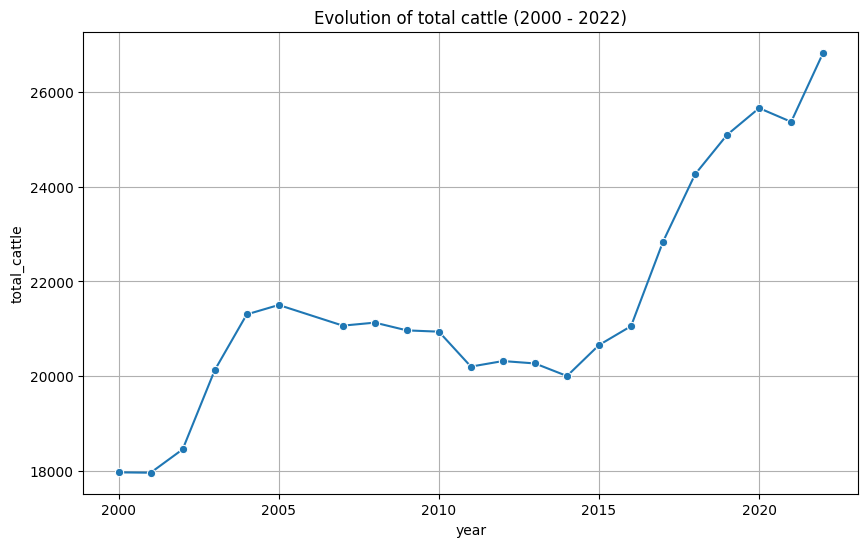

In [23]:
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    df,
    x='year',
    y='total_cattle',
    ci=None,  
    marker='o'
)
plt.title('Evolution of total cattle (2000 - 2022)')
plt.grid(True)
plt.show()

Wow, it seems that cattle have had a growing trend in Antioquia over the last few years and had a boom around 2014.

Let's see what the growth has been like over the years in the different sub-regions.

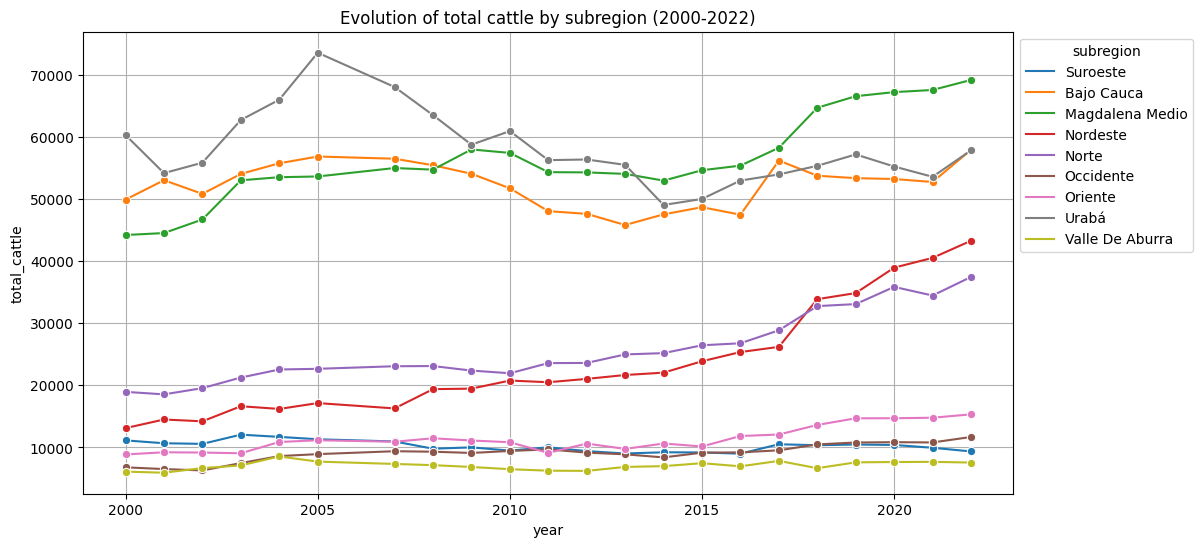

In [24]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    df,
    x='year',
    y='total_cattle',
    hue='subregion',
    ci=None,  
    marker='o' 
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Evolution of total cattle by subregion (2000-2022)")
plt.grid(True)
plt.show()


With this we can clearly determine which are the 3 subregions of Antioquia with more cattle and the changes that have occurred over the years (Magdalena Medio, Uraba, Bajo Cauca).

We can see that Uraba was the subregion with the most cattle until 2010, when it dropped from 60,000 to just under 50,000 cattle and has been recovering consistently.

also how magdalena started the year 2000 being #3 and since 2014 has not stopped rising, positioning itself in 2022 as the subregion with more cattle in antioquia.

## Growth in male and female cattle population

In [25]:
sex_by_year = df.groupby('year')[['total_males', 'total_females']].sum().reset_index()

sex_by_year = sex_by_year.rename(columns={
    'total_males': 'male',
    'total_females': 'female'
})

sex_by_year_melted = sex_by_year.melt(
    id_vars='year', value_vars=['male', 'female'],
    var_name='sex', value_name='total'
)

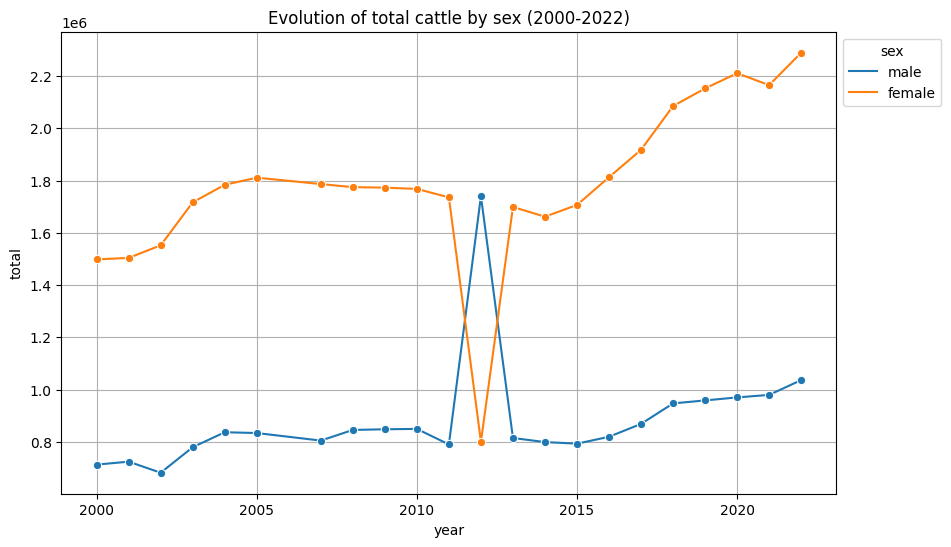

In [26]:
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    sex_by_year_melted,
    x='year',
    y='total',
    hue='sex',
    marker='o',
    ci=None
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.title("Evolution of total cattle by sex (2000-2022)")
plt.show()

Wow what is that?

We see that in 2012 the number of female bovines drops drastically and rises again in 2013, as well as male bovines, which skyrocket in 2012 and decline again in 2013.

If we analyze the trend of the data, we can notice something quite curious, and that is that the data for the males, it seems to be that of the females, and for the females, it seems to be that of the males.

This may represent a typing or data failure, so let's swap our dataset and see how it behaves.

First, let's check if the total value columns are the ones that are failing or the other columns as well. 

In [27]:
anomally_2012 = df.loc[df['year'] == 2012]

male_count_anomally_2012 = anomally_2012[['male_calf_under_12_months',
    'male_steer_12_to_24_months',
    'male_steer_24_to_36_months',
    'male_bulls_over_36_months']].sum()
male_count_anomally_2012 = male_count_anomally_2012.sum()

female_count_anomally_2012 = anomally_2012[['female_calf_under_12_months',
    'female_heifer_12_to_24_months',
    'female_heifer_24_to_36_months',
    'female_cows_over_36_months']].sum()
female_count_anomally_2012 = female_count_anomally_2012.sum()

In [28]:
if anomally_2012['total_cattle'].sum() == anomally_2012['total_males'].sum() + anomally_2012['total_females'].sum():
    ok = True
else:
    ok = False
ok

True

In [29]:
if male_count_anomally_2012 == anomally_2012['total_males'].sum():
    ok = True
else:
    ok = False
ok

True

In [30]:
if female_count_anomally_2012 == anomally_2012['total_females'].sum():
    ok = True
else:
    ok = False
ok

True

Ok, now we know that we must change all the columns associated with bovine accounting.

In [31]:
mask = df['year'] == 2012
male_cols = [
    'male_calf_under_12_months',
    'male_steer_12_to_24_months',
    'male_steer_24_to_36_months',
    'male_bulls_over_36_months'
]

female_cols = [
    'female_calf_under_12_months',
    'female_heifer_12_to_24_months',
    'female_heifer_24_to_36_months',
    'female_cows_over_36_months'
]
df.loc[mask, male_cols + female_cols] = df.loc[mask, female_cols + male_cols].values
df.loc[mask, ['total_males', 'total_females']] = df.loc[mask, ['total_females', 'total_males']].values

In [32]:
sex_by_year = df.groupby('year')[['total_males', 'total_females']].sum().reset_index()

sex_by_year = sex_by_year.rename(columns={
    'total_males': 'male',
    'total_females': 'female'
})

sex_by_year_melted = sex_by_year.melt(
    id_vars='year', value_vars=['male', 'female'],
    var_name='sex', value_name='total'
)

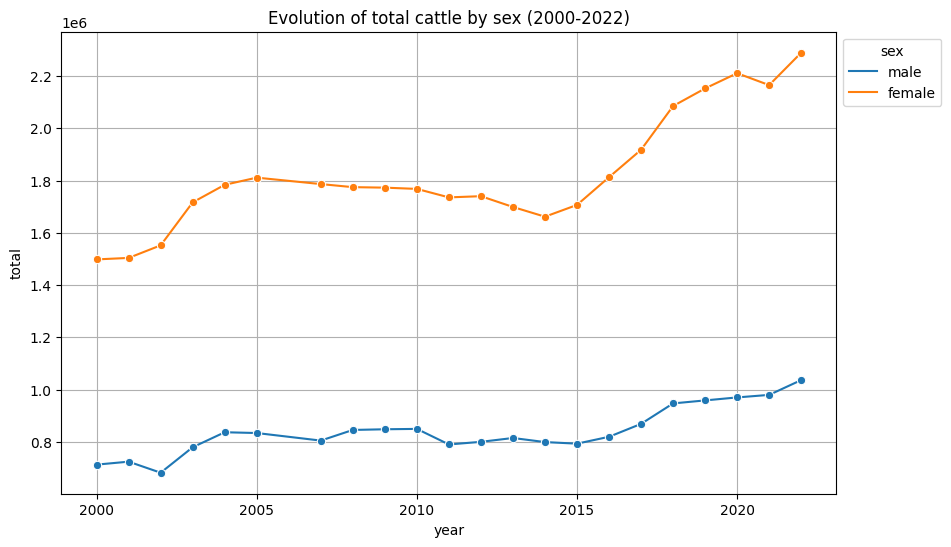

In [33]:
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    sex_by_year_melted,
    x='year',
    y='total',
    hue='sex',
    marker='o',
    ci=None
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.title("Evolution of total cattle by sex (2000-2022)")
plt.show()

Well, now the data and the graph makes much more sense, it follows its trend logically, as it should, so we will leave it like this

now let's look at this same distribution by subregion!

## Sex of cattle in different subregions

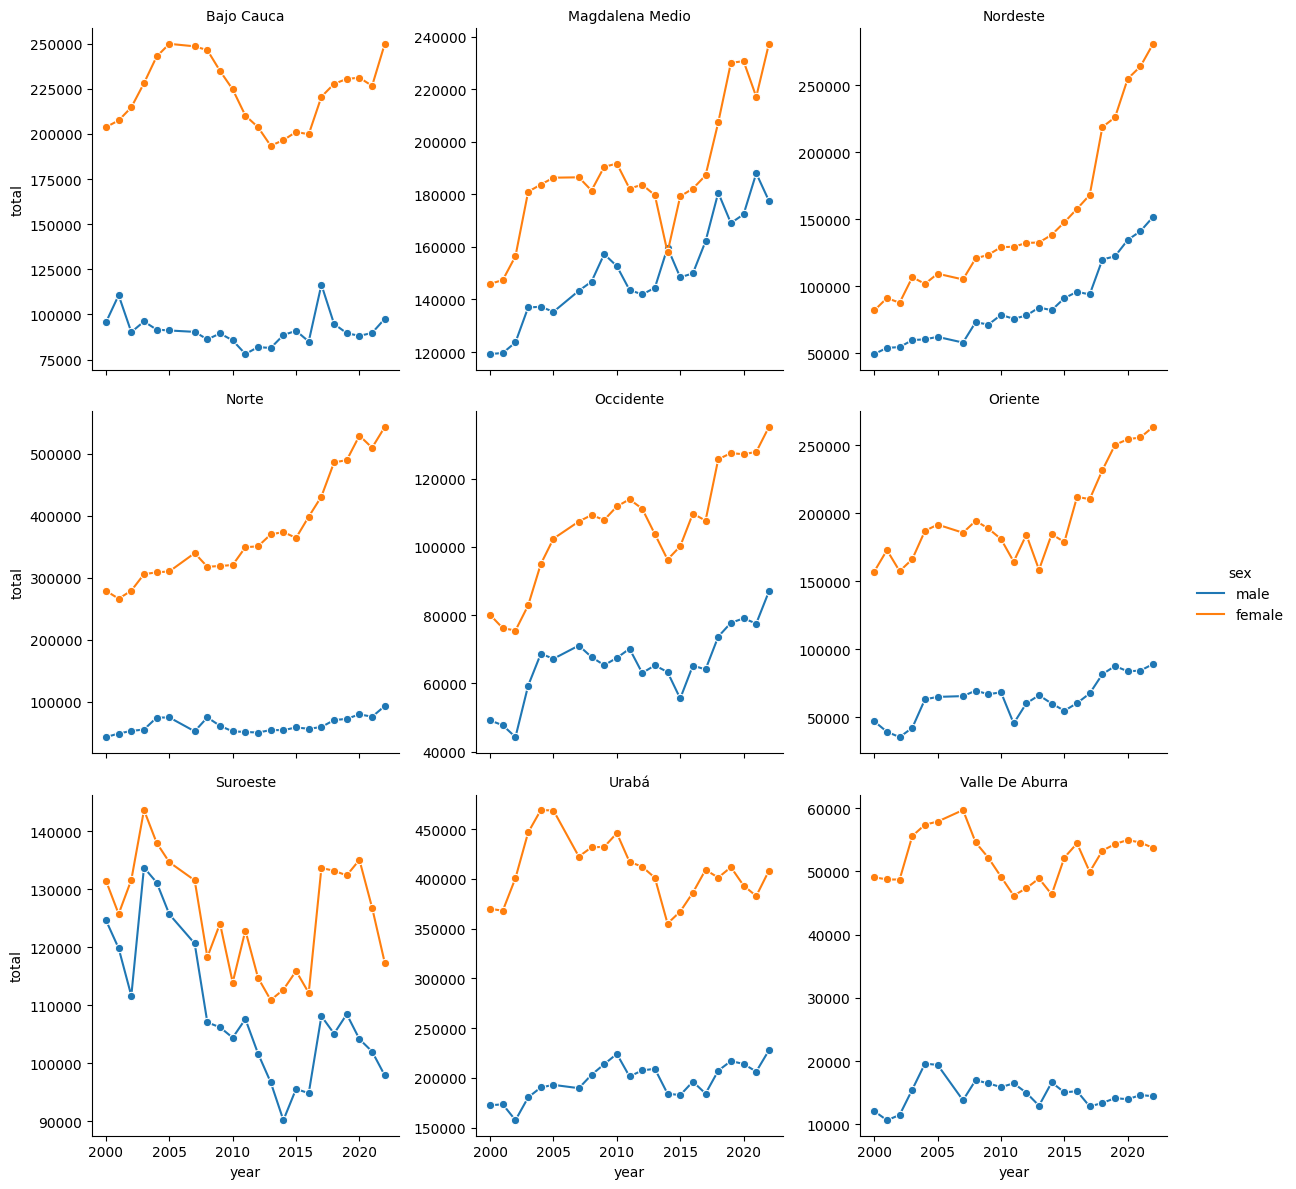

In [34]:
df_grouped = df.groupby(['year', 'subregion'])[['total_males', 'total_females']].sum().reset_index()

df_grouped = df_grouped.rename(columns={
    'total_males': 'male',
    'total_females': 'female'
})

df_melted = df_grouped.melt(
    id_vars=['year', 'subregion'],
    value_vars=['male', 'female'],
    var_name='sex',
    value_name='total'
)

g = sns.relplot(
    data=df_melted,
    x='year',
    y='total',
    hue='sex',
    kind='line',
    col='subregion',
    marker='o',
    col_wrap=3,  
    height=4,
    facet_kws={'sharey': False}
)
g.set_titles("{col_name}")
g.tight_layout()
plt.show()

This graph is very revealing, we can see how Bajo Cauca has always had the highest number of females and few males.

The opposite is the case for example with the Northeast, where we can see how they started in the year 2000 with very few females and males and have had an increasing tendency over the years.

On the other hand, the Southwest has had a trend of strong ups and downs tending to fall both males and females.

now, we are not going to ignore the fact that in Magdalena Medio, in the year 2014, there is an unusual drop in females, we are going to investigate a little more about what may be causing it and see if we can find a solution to this.

In [35]:
df[(df['year'] == 2014) & (df['subregion'] == 'Magdalena Medio')][
    ['municipality', 'total_males', 'total_females']
].sort_values('total_females')

,municipality,total_males,total_females
1625,Caracolí,7486,3757
1626,Maceo,12030,15138
1629,Puerto Triunfo,18431,20214
1628,Puerto Nare,18876,29827
1630,Yondó,56490,40907
1627,Puerto Berrío,46412,48116


In [36]:
df_mm = df[df['subregion'] == 'Magdalena Medio']
df_mm.groupby('year')[['total_males', 'total_females']].sum()

,total_males,total_females
year,,
2000,119240,145938
2001,119625,147417
2002,123671,156495
2003,136972,181019
2004,137218,183766
2005,135317,186374
2007,143322,186517
2008,146788,181488
2009,157290,190504


now, we are not going to ignore the fact that in Magdalena Medio, in the year 2014, there is an unusual drop in females, we are going to investigate a little more about what may be causing it and see if we can find a solution to this.

In [37]:
df_mm = df[df['subregion'] == 'Magdalena Medio']

proportion_base = df_mm[df_mm['year'] == 2013][['municipality'] + female_cols].copy()
proportion_base.set_index('municipality', inplace=True)
total_2013 = proportion_base.sum()

In [38]:
avg_by_cat = (
    df_mm[df_mm['year'] == 2013][female_cols].sum() +
    df_mm[df_mm['year'] == 2015][female_cols].sum()
) // 2

In [39]:
for col in female_cols:
    prop = proportion_base[col] / total_2013[col]
    df.loc[(df['year'] == 2014) & (df['subregion'] == 'Magdalena Medio'), col] = \
        df_mm[df_mm['year'] == 2014]['municipality'].map(lambda m: prop[m] * avg_by_cat[col])

In [40]:
df.loc[(df['year'] == 2014) & (df['subregion'] == 'Magdalena Medio'), 'total_females'] = \
    df.loc[(df['year'] == 2014) & (df['subregion'] == 'Magdalena Medio'), female_cols].sum(axis=1)

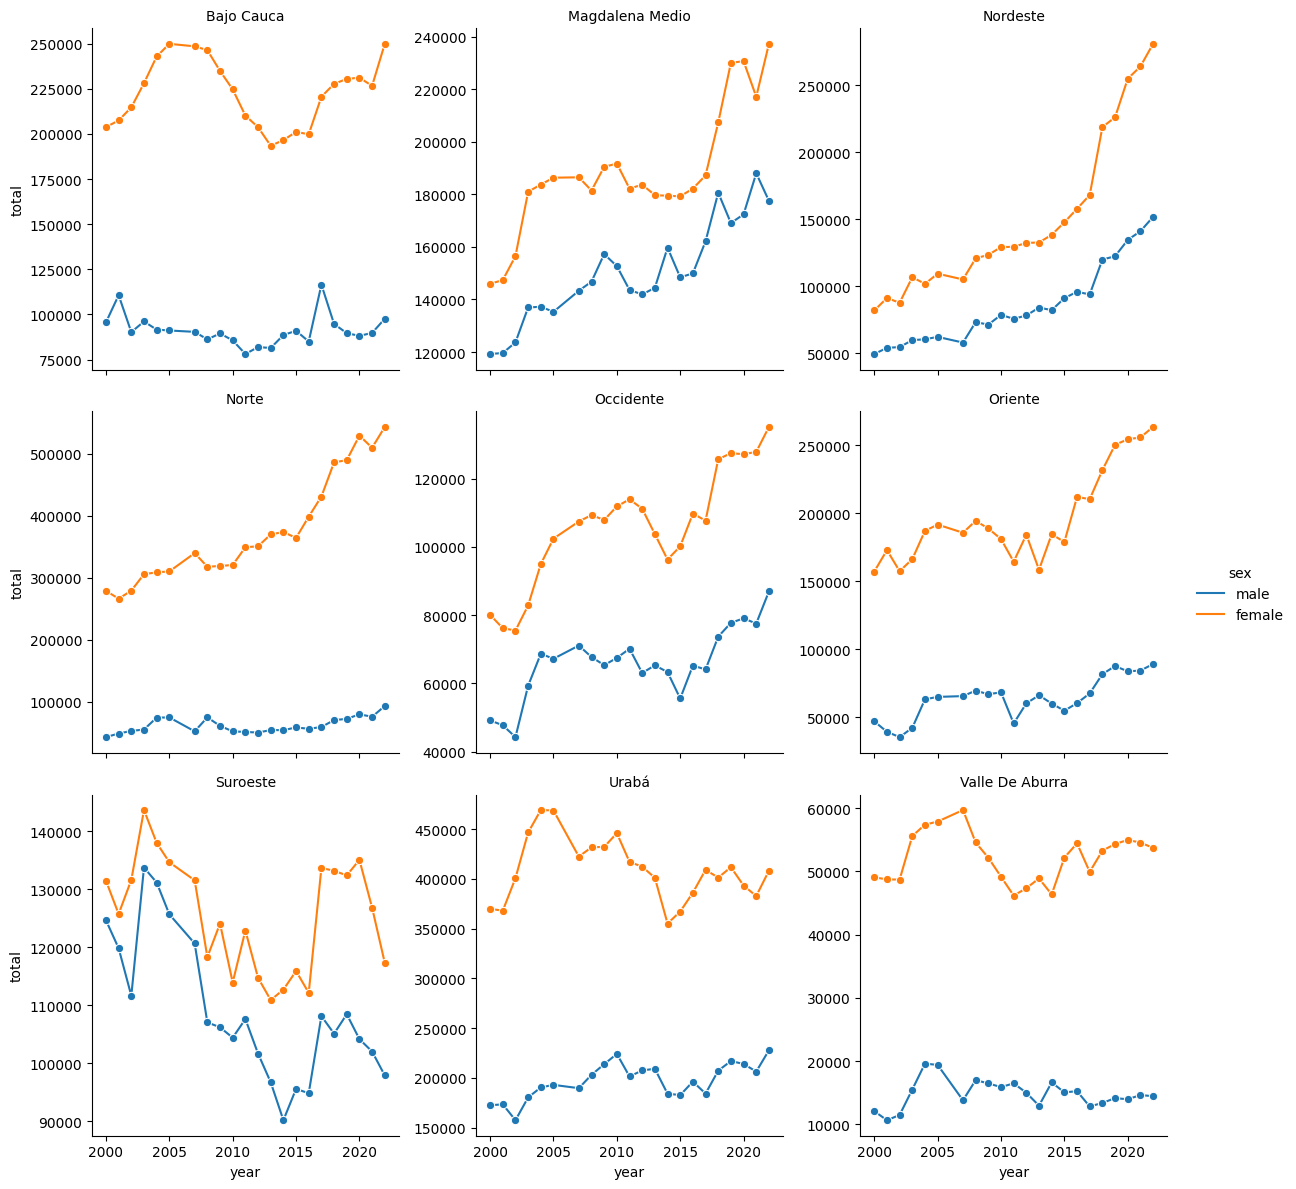

In [41]:
df_grouped = df.groupby(['year', 'subregion'])[['total_males', 'total_females']].sum().reset_index()

df_grouped = df_grouped.rename(columns={
    'total_males': 'male',
    'total_females': 'female'
})

df_melted = df_grouped.melt(
    id_vars=['year', 'subregion'],
    value_vars=['male', 'female'],
    var_name='sex',
    value_name='total'
)

g = sns.relplot(
    data=df_melted,
    x='year',
    y='total',
    hue='sex',
    kind='line',
    col='subregion',
    marker='o',
    col_wrap=3,  
    height=4,
    facet_kws={'sharey': False}
)
g.set_titles("{col_name}")
g.tight_layout()
plt.show()

Perfect, now I have a smoother and more logical transition, which will avoid problems or excessive noise in the model that we are going to train later.

## Grass distribution through the years

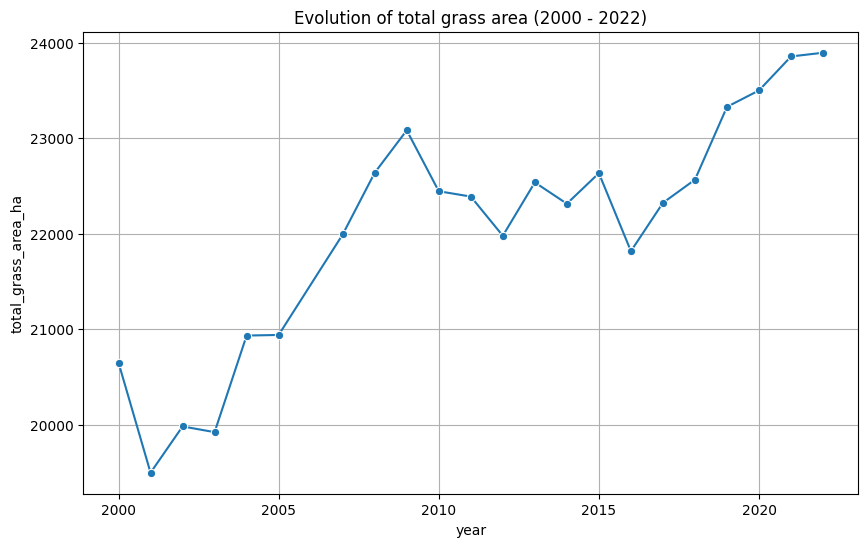

In [42]:
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    df,
    x='year',
    y='total_grass_area_ha',
    ci=None,  
    marker='o'
)
plt.title('Evolution of total grass area (2000 - 2022)')
plt.grid(True)
plt.show()

Ok, we see that there is a clear upward trend, with clear disoppositions in 2005 and 2016.

Let's see what kind of grams make up this graph

## Grass type distribution over the years

In [43]:
grass_by_year = df.groupby('year')[['cut_grass_area_ha', 'natural_grass_area_ha',
                                 'improved_grass_area_ha', 'forage_grass_area_ha',
                                 'silvopastoral_area_ha']].sum().reset_index()

grass_by_year = grass_by_year.rename(columns={
    'cut_grass_area_ha': 'cut',
    'natural_grass_area_ha': 'natural',
    'improved_grass_area_ha': 'improved',
    'forage_grass_area_ha': 'forage',
    'silvopastoral_area_ha': 'silvopastoral'
})

grass_by_year_melted = grass_by_year.melt(
    id_vars='year', value_vars=['cut', 'natural', 'improved', 'forage', 'silvopastoral'],
    var_name='grass', value_name='total'
)

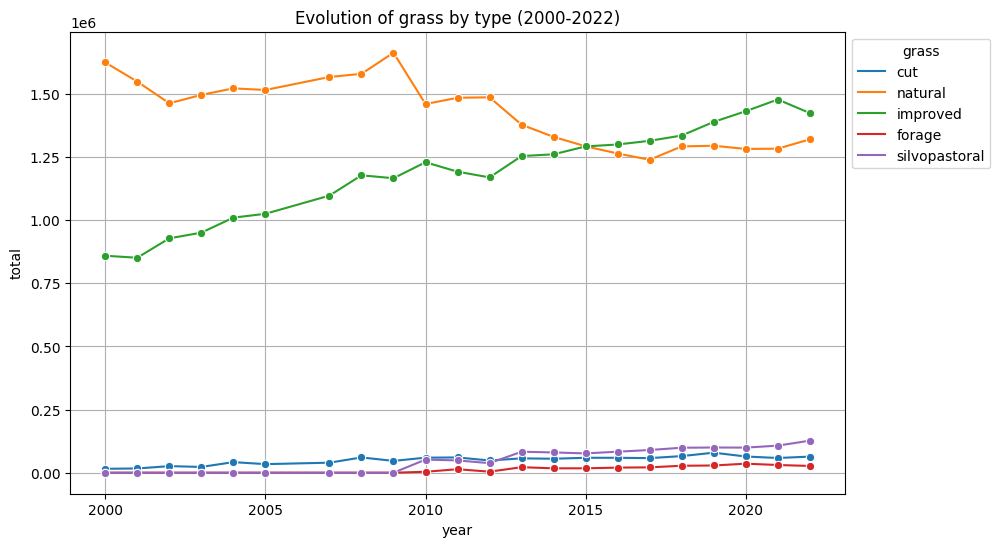

In [44]:
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    grass_by_year_melted,
    x='year',
    y='total',
    hue='grass',
    marker='o',
    ci=None
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.title("Evolution of grass by type (2000-2022)")
plt.show()

Ok, we can see that since 2009 the amount of natural grass has tended to decrease and since 2001 the amount of improved grass has not stopped increasing, thus surpassing the amount of natural grass.

On the other hand, we see how cut grass has always maintained a very linear trend, as well as forage grass, on the other hand, in 2019 there was a small increase in the amount of silvopastoral grass.

now let's see how it is distributed in the different departments

## Distribution of grass type by sub-region over the years

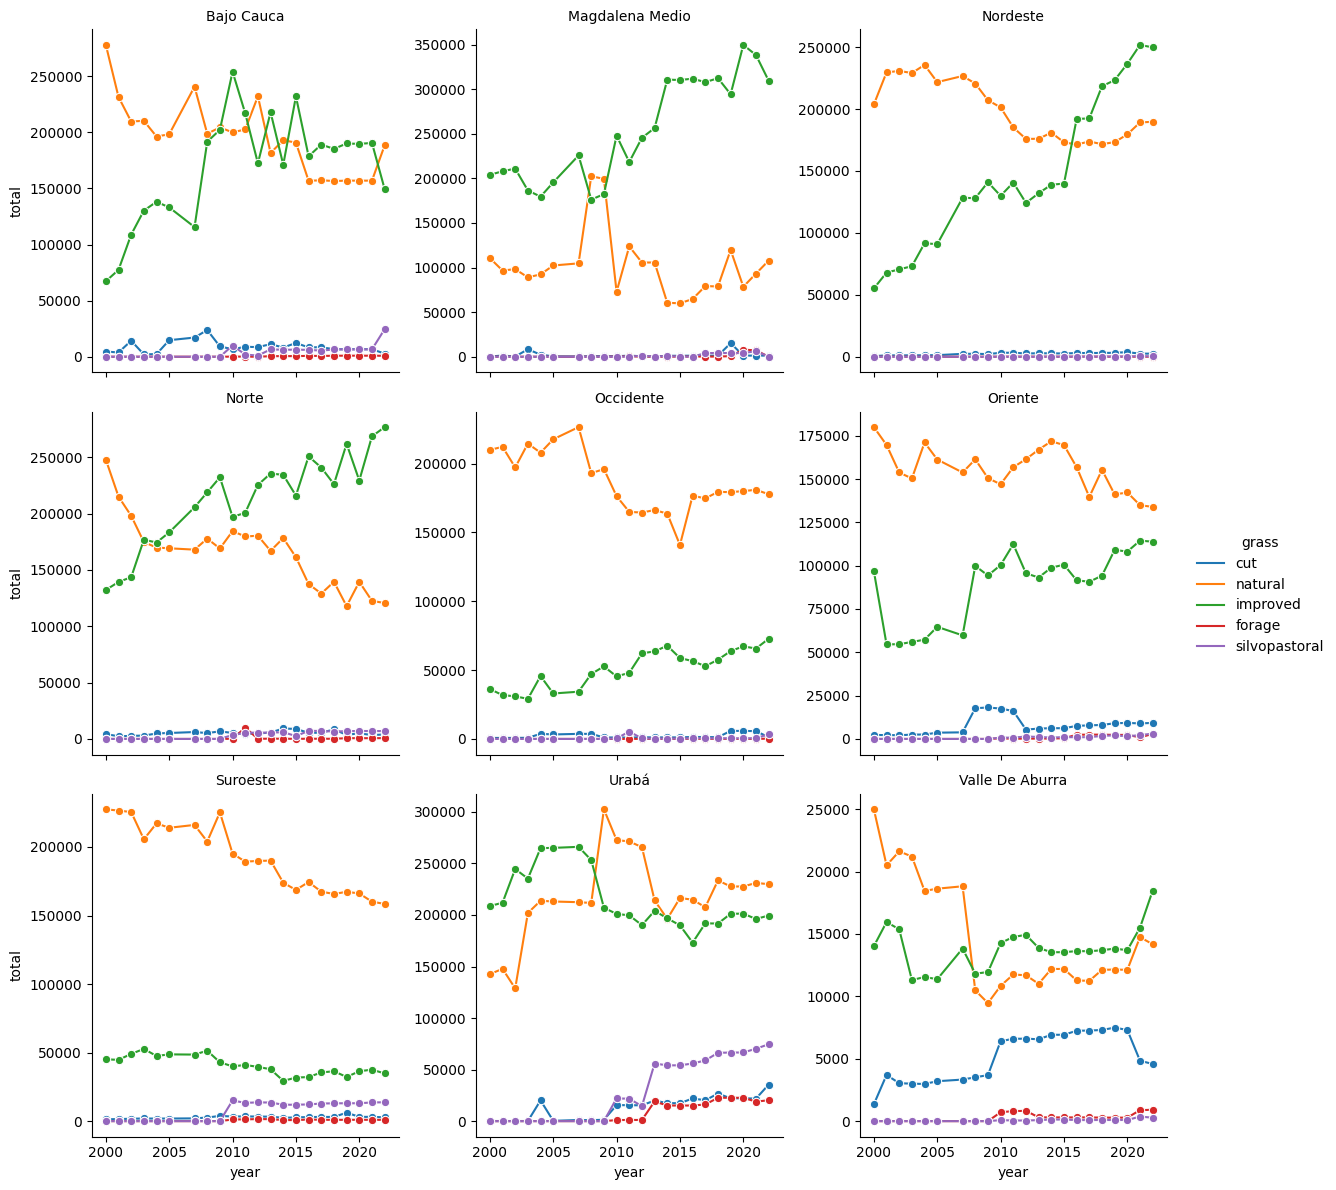

In [45]:
df_grouped = df.groupby(['year', 'subregion'])[['cut_grass_area_ha', 'natural_grass_area_ha',
                                 'improved_grass_area_ha', 'forage_grass_area_ha',
                                 'silvopastoral_area_ha']].sum().reset_index()

df_grouped = df_grouped.rename(columns={
   'cut_grass_area_ha': 'cut',
    'natural_grass_area_ha': 'natural',
    'improved_grass_area_ha': 'improved',
    'forage_grass_area_ha': 'forage',
    'silvopastoral_area_ha': 'silvopastoral'
})

df_melted = df_grouped.melt(
    id_vars=['year', 'subregion'],
    value_vars=['cut', 'natural', 'improved', 'forage', 'silvopastoral'],
    var_name='grass',
    value_name='total'
)

g = sns.relplot(
    data=df_melted,
    x='year',
    y='total',
    hue='grass',
    kind='line',
    col='subregion',
    marker='o',
    col_wrap=3,  
    height=4,
    facet_kws={'sharey': False}
)
g.set_titles("{col_name}")
g.tight_layout()
plt.show()

ok, we see a lot of data with big jumps, which may indicate lack of data logging or triggers in the amount of grama, I guess it may be a data issue, but it lets us clearly see the linearity of the trends.

We see how all sub-regions have tended to decrease the amount of natural grass and increase the amount of improved grass, thus making the improved grass greater than the natural grass.

However, there are several subregions that do not comply with this trend, such as the southwest, which is tending to decrease the natural grass, but not to increase the improved grass, as in the Uraba, where they started 2000 with more improved grass than natural grass, and now they are tending to decrease the improved grass and increase the natural grass.

there are other regions such as the west, which do have this tendency, but they still do not manage to overcome the amount of natural grass with the improved one.

we can also see how the aburra valley is the sub-region with the highest amount of cut grass.

# ML Models

## Correlations

before proceeding to look for the variables with more correlations, I would like to take another look at the columns we have at the moment.

In [46]:
df.columns

Index(['year', 'subregion', 'municipality', 'male_calf_under_12_months', 'male_steer_12_to_24_months', 'male_steer_24_to_36_months', 'male_bulls_over_36_months', 'total_males', 'female_calf_under_12_months', 'female_heifer_12_to_24_months', 'female_heifer_24_to_36_months', 'female_cows_over_36_months', 'total_females', 'total_cattle', 'cut_grass_area_ha', 'natural_grass_area_ha', 'improved_grass_area_ha', 'forage_grass_area_ha', 'silvopastoral_area_ha', 'total_grass_area_ha'], dtype='object')

In [47]:
df.dtypes

year                               int64
subregion                         object
municipality                      object
male_calf_under_12_months        float64
male_steer_12_to_24_months       float64
male_steer_24_to_36_months       float64
male_bulls_over_36_months        float64
total_males                        int64
female_calf_under_12_months      float64
female_heifer_12_to_24_months    float64
female_heifer_24_to_36_months    float64
female_cows_over_36_months       float64
total_females                    float64
total_cattle                     float64
cut_grass_area_ha                float64
natural_grass_area_ha            float64
improved_grass_area_ha           float64
forage_grass_area_ha             float64
silvopastoral_area_ha            float64
total_grass_area_ha              float64
dtype: object

Let's see how many unique values the two object type columns we have in the table have

In [48]:
df['subregion'].unique().shape

(9,)

In [49]:
df['municipality'].unique().shape

(125,)

We see that the subregions column has a low cardinality with a total of 9 unique values, which makes it a good candidate to perform a One Hot Encoding to this column in order to use it for our models.

On the other hand, the municipality column has a total of 125 unique values, which would be a high cardinality if we want to do one hot encoding, it is not feasible to do a traditional encoding (1, 2, 3...) because it can confuse the model and think that the department X is more than department Y.

Taking this into account, for this case I will choose to eliminate this column for the creation of our models.

In [50]:
ml_data = df.drop(columns=['municipality']).copy()

In [51]:
from sklearn.preprocessing import OneHotEncoder

We apply the OHE

In [52]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
subregion_encoded = pd.DataFrame(
    OH_encoder.fit_transform(ml_data[['subregion']]),
    columns=OH_encoder.get_feature_names_out(['subregion']),
    index=ml_data.index  
)

ml_data = ml_data.drop(columns=['subregion'])
ml_data = pd.concat([ml_data, subregion_encoded], axis=1)

In [53]:
ml_data.columns

Index(['year', 'male_calf_under_12_months', 'male_steer_12_to_24_months', 'male_steer_24_to_36_months', 'male_bulls_over_36_months', 'total_males', 'female_calf_under_12_months', 'female_heifer_12_to_24_months', 'female_heifer_24_to_36_months', 'female_cows_over_36_months', 'total_females', 'total_cattle', 'cut_grass_area_ha', 'natural_grass_area_ha', 'improved_grass_area_ha', 'forage_grass_area_ha', 'silvopastoral_area_ha', 'total_grass_area_ha', 'subregion_Bajo Cauca', 'subregion_Magdalena Medio', 'subregion_Nordeste', 'subregion_Norte', 'subregion_Occidente', 'subregion_Oriente', 'subregion_Suroeste', 'subregion_Urabá', 'subregion_Valle De Aburra'], dtype='object')

Rename the columns to eliminate indented spaces and accents

In [54]:
ml_data = ml_data.rename(columns={
    'subregion_Bajo Cauca':'subregion_Bajo_Cauca', 
    'subregion_Magdalena Medio':'subregion_Magdalena_Medio',
    'subregion_Urabá':'subregion_Uraba',
    'subregion_Valle De Aburra':'subregion_Valle_De_Aburra'
})

Now, let's check the correlation between all the numerical variables in our dataframe

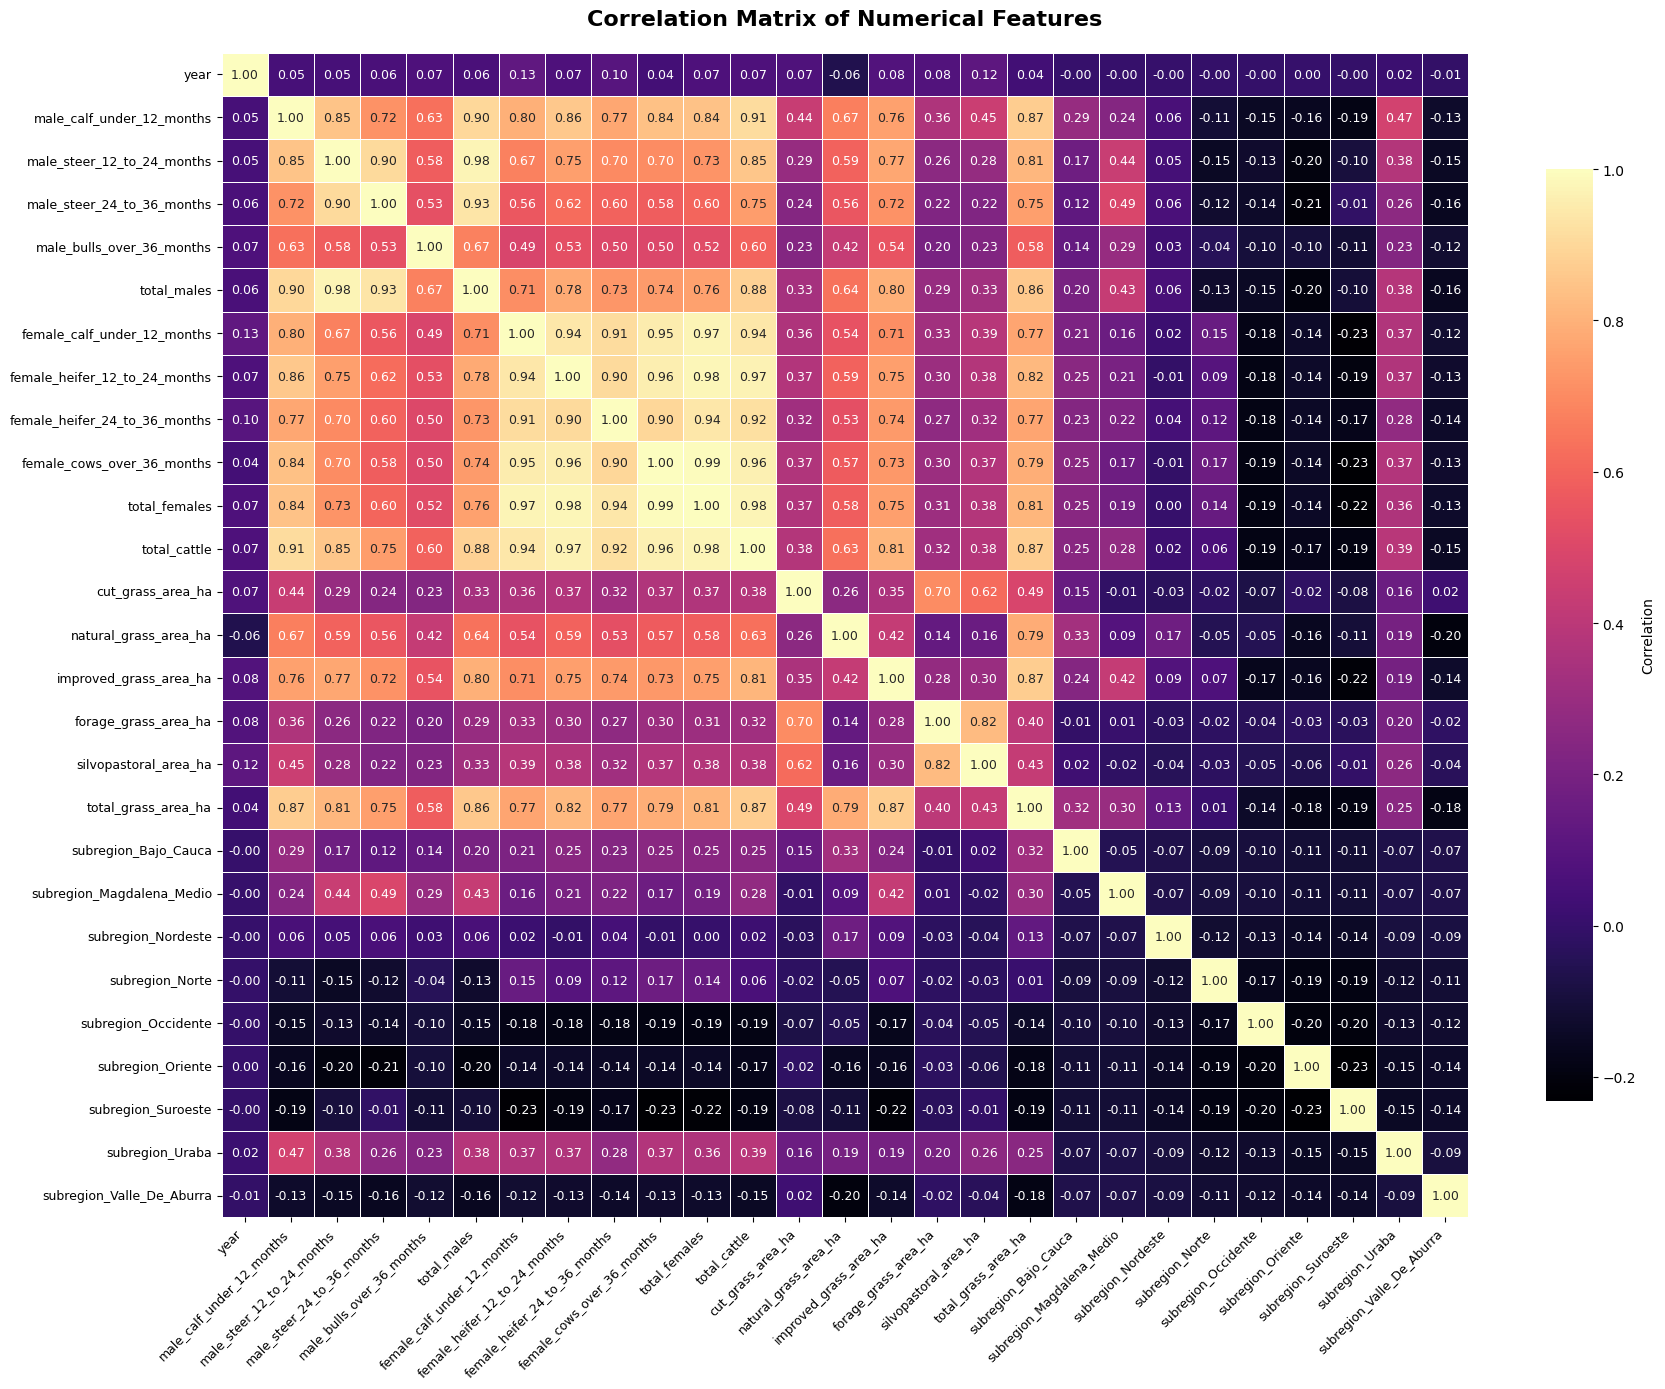

In [55]:
numerical_features = ml_data.select_dtypes(include=["int64", "float64"]).columns
corr_matrix = ml_data[numerical_features].corr()

plt.figure(figsize=(18, 14))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cmap="magma",
    annot_kws={"size": 9},
    cbar_kws={'shrink': 0.8, 'label': 'Correlation'}
)

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)

plt.title("Correlation Matrix of Numerical Features", fontsize=16, weight='bold', pad=20)

plt.tight_layout()
plt.show()

Ok, interesting, we see that there are many variables that have a good correlation between them.

since what we want to predict is the total number of cattle, reviewing the variables with the highest correlation are the amount of grass area and the amount of improved grass.

## Cattle Prediction Models

In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

let's select the features that our models will use to predict the total number of cattle.

for this case we will use the amount of normal and improved grass, we will also use the subregions as a variable to further refine the model response.

In [57]:
features = ['improved_grass_area_ha', 'total_grass_area_ha', 
            'subregion_Bajo_Cauca', 'subregion_Magdalena_Medio', 
            'subregion_Nordeste', 'subregion_Norte', 
            'subregion_Occidente', 'subregion_Oriente', 
            'subregion_Suroeste', 'subregion_Uraba', 
            'subregion_Valle_De_Aburra']

X = ml_data[features]
y = ml_data.total_cattle

Let's set aside a portion of our data for training. 

In [58]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

### Decision Tree Regressor Model

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [61]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [62]:
cattle_prediction_model = DecisionTreeRegressor(random_state=1)
cattle_prediction_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

Let's see which is the best leaf for our model.

In [63]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

best_mae = 0
best_leaf = 0
for leaf in candidate_max_leaf_nodes:
    mae = get_mae(leaf, train_X, val_X, train_y, val_y)
    if leaf == candidate_max_leaf_nodes[0]:
        best_mae = mae
        best_leaf = leaf
    else:
        if mae < best_mae:
            best_mae = mae
            best_leaf = leaf

best_tree_size = best_leaf

best_tree_size

500

In [64]:
cattle_prediction_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size)
cattle_prediction_model.fit(train_X, train_y)

DecisionTreeRegressor(max_leaf_nodes=500)

In [65]:
mae = get_mae(best_tree_size, train_X, val_X, train_y, val_y)
print(f'MAE: {mae}')

preds = cattle_prediction_model.predict(val_X)
r2 = r2_score(val_y, preds)
print(f"R²: {r2:.4f}")

mape = mean_absolute_percentage_error(val_y, preds)
print(f"MAPE: {mape:.2f}%")

MAE: 3525.3443850415806
R²: 0.9160
MAPE: 33.44%


Let's see if we can improve on this

In [66]:
param_grid_tree = {
    'max_depth': [3, 5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_leaf_nodes': [None, 10, 25, 50, 100, 250, 500],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [67]:
tree_model = DecisionTreeRegressor(random_state=1)

random_search_tree = RandomizedSearchCV(
    estimator=tree_model,
    param_distributions=param_grid_tree,
    n_iter=30,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

random_search_tree.fit(train_X, train_y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 25, 50,
                                                           100, 250, 500],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [68]:
best_tree = random_search_tree.best_estimator_
tree_preds = best_tree.predict(val_X)

tree_mae = mean_absolute_error(val_y, tree_preds)
tree_r2 = r2_score(val_y, tree_preds)
tree_mape = mean_absolute_percentage_error(val_y, tree_preds)

print("Mejores hiperparámetros:", random_search_tree.best_params_)
print(f"MAE: {tree_mae:.2f}")
print(f"R²: {tree_r2:.4f}")
print(f"MAPE: {tree_mape:.2f}%")

Mejores hiperparámetros: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': None}
MAE: 3388.68
R²: 0.9165
MAPE: 30.16%


Not improved enough

### Random Forest regressor Model

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

In [71]:
rf_preds = rf_model.predict(val_X)

In [72]:
rf_mae = mean_absolute_error(val_y, rf_preds)
rf_r2 = r2_score(val_y, rf_preds)
rf_mape = mean_absolute_percentage_error(val_y, rf_preds)

print(f"MAE: {rf_mae:.2f}")
print(f"R²: {rf_r2:.4f}")
print(f"MAPE: {rf_mape:.2f}%")

MAE: 3283.45
R²: 0.9332
MAPE: 29.39%


Wow, it's good, but let's try to improve it.

In [73]:
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [74]:
rf_model = RandomForestRegressor(random_state=1)

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=30,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

random_search_rf.fit(train_X, train_y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [75]:
best_rf = random_search_rf.best_estimator_
rf_preds = best_rf.predict(val_X)

rf_mae = mean_absolute_error(val_y, rf_preds)
rf_r2 = r2_score(val_y, rf_preds)
rf_mape = mean_absolute_percentage_error(val_y, rf_preds)

print("Best Params:", random_search_rf.best_params_)
print(f"MAE: {rf_mae:.2f}")
print(f"R²: {rf_r2:.4f}")
print(f"MAPE: {rf_mape:.2f}%")

Best Params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
MAE: 3236.80
R²: 0.9345
MAPE: 29.28%


Wow, it got a lot better

### Xboost Model

In [76]:
from xgboost import XGBRegressor

In [77]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=1)
xgb_model.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [78]:
xgb_preds = xgb_model.predict(val_X)

xgb_mae = mean_absolute_error(val_y, xgb_preds)
xgb_r2 = r2_score(val_y, xgb_preds)
xgb_mape = mean_absolute_percentage_error(val_y, xgb_preds)

print(f"MAE: {xgb_mae:.2f}")
print(f"R²: {xgb_r2:.4f}")
print(f"MAPE: {xgb_mape:.2f}%")

MAE: 3697.89
R²: 0.9386
MAPE: 40.39%


Ok, that's wrong, let's try to improve it

In [79]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [80]:
xgb_model = XGBRegressor(random_state=1)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=30,  # Número de combinaciones a probar
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

random_search.fit(train_X, train_y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=1, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [81]:
print("Best Params:", random_search.best_params_)

Best Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [82]:
best_xgb = random_search.best_estimator_
xgb_preds = best_xgb.predict(val_X)

xgb_mae = mean_absolute_error(val_y, xgb_preds)
xgb_r2 = r2_score(val_y, xgb_preds)
xgb_mape = mean_absolute_percentage_error(val_y, xgb_preds)

print(f"MAE: {xgb_mae:.2f}")
print(f"R²: {xgb_r2:.4f}")
print(f"MAPE: {xgb_mape:.2f}%")

MAE: 3098.94
R²: 0.9473
MAPE: 31.87%


is not enough

## Which one is best for this case?

In [83]:
results = {
    "Modelo": [
        "Decision Tree (Tuned)",
        "Random Forest (Tuned)",
        "XGBoost (Tuned)"
    ],
    "MAE": [
        tree_mae,    # DT tuned
        rf_mae,      # RF tuned
        xgb_mae      # XGB tuned
    ],
    "R2": [
        tree_r2,
        rf_r2,
        xgb_r2
    ],
    "MAPE": [
        tree_mape,
        rf_mape,
        xgb_mape
    ]
}

comparativa_df = pd.DataFrame(results)

comparativa_df

,Modelo,MAE,R2,MAPE
0,Decision Tree (Tuned),3388.677872,0.916486,30.158970
1,Random Forest (Tuned),3236.802846,0.934523,29.279379
2,XGBoost (Tuned),3098.939065,0.947328,31.874321


We see that the model with the lowest Mean Absolute Error (MAE), the highest explanatory power (R2) and the lowest Mean Absolute Percentage Error (MAPE) is...

### The Random Forest!

let's try to improve it a little more by adding more features that I can use. and let's hope there is no overfitting.

In [84]:
features = ['cut_grass_area_ha', 'natural_grass_area_ha', 'improved_grass_area_ha', 'forage_grass_area_ha', 'silvopastoral_area_ha', 'total_grass_area_ha','subregion_Bajo_Cauca', 'subregion_Magdalena_Medio', 'subregion_Nordeste', 'subregion_Norte', 'subregion_Occidente', 'subregion_Oriente', 'subregion_Suroeste', 'subregion_Uraba', 'subregion_Valle_De_Aburra']

X = ml_data[features]
y = ml_data.total_cattle

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

rf_model = RandomForestRegressor(random_state=1)

random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=30,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

random_search_rf.fit(train_X, train_y)

best_rf = random_search_rf.best_estimator_
rf_preds = best_rf.predict(val_X)

rf_mae = mean_absolute_error(val_y, rf_preds)
rf_r2 = r2_score(val_y, rf_preds)
rf_mape = mean_absolute_percentage_error(val_y, rf_preds)

print("Best Params:", random_search_rf.best_params_)
print(f"MAE: {rf_mae:.2f}")
print(f"R²: {rf_r2:.4f}")
print(f"MAPE: {rf_mape:.2f}%")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
MAE: 2781.56
R²: 0.9554
MAPE: 29.40%


Wow, it's much better

# Please Up Vote if you liked what I did with this dataset and you found it useful.